# EDA

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Load dataset from CSV file
df = pd.read_csv("../Data/insurance.csv")

In [55]:
# Display first few rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
df.shape

(1338, 7)

In [57]:
# Display dataframe information including data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [58]:
# Generate descriptive statistics for numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [59]:
# Check for missing values in the dataframe
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

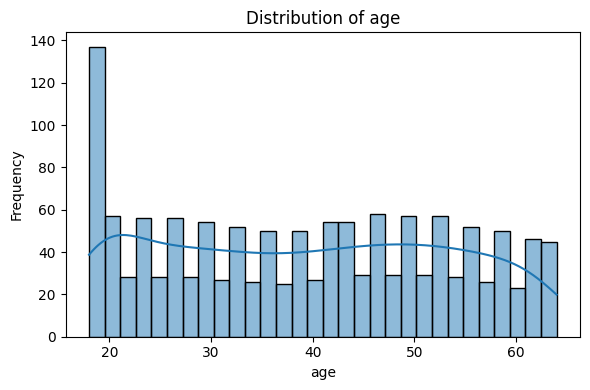

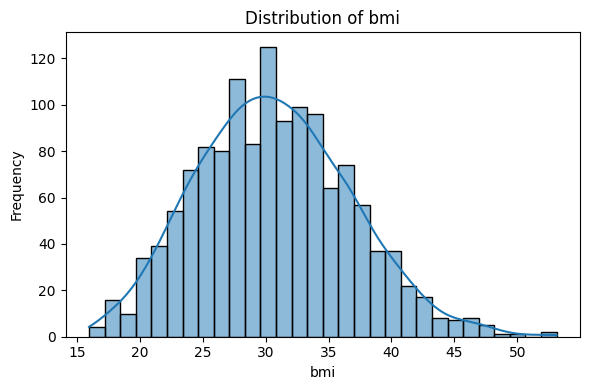

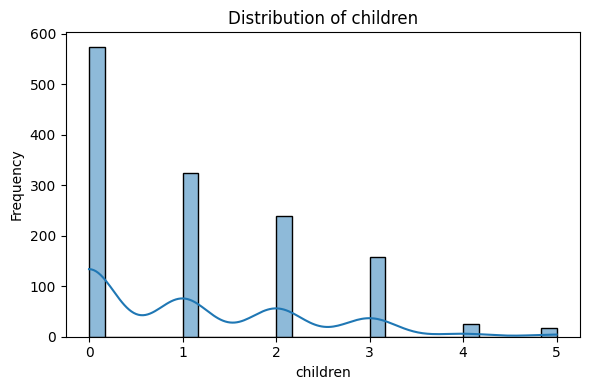

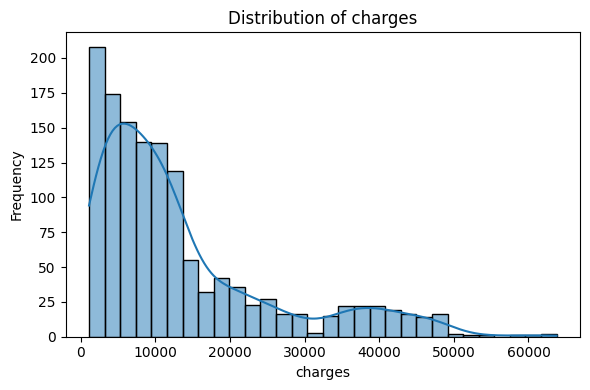

In [60]:
# Plotting operation
numerical_columns = ['age','bmi','children','charges']
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde = True , bins = 30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


<Axes: xlabel='children', ylabel='count'>

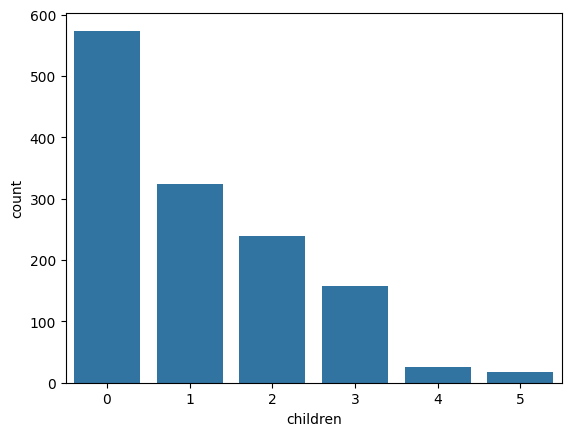

In [61]:
# Statistical visualization
sns.countplot(x = df['children'])

<Axes: xlabel='sex', ylabel='count'>

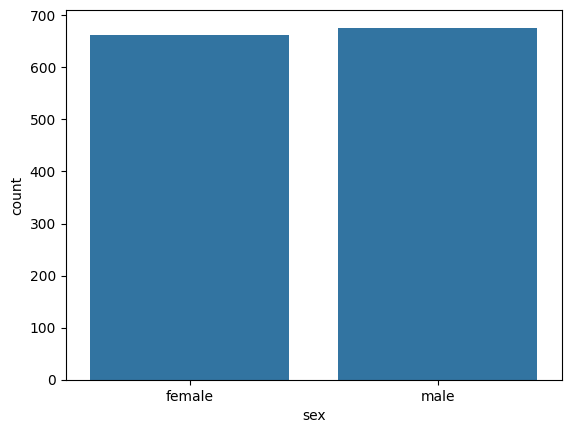

In [62]:
# Statistical visualization
sns.countplot(x = df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

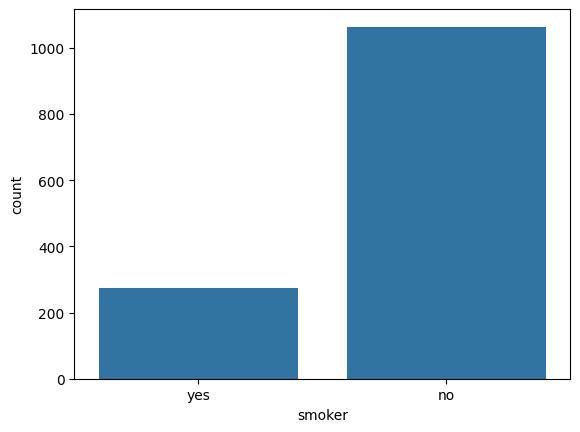

In [63]:
# Statistical visualization
sns.countplot(x = df['smoker'])

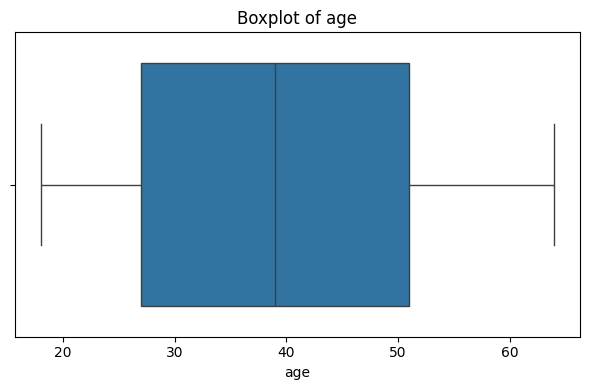

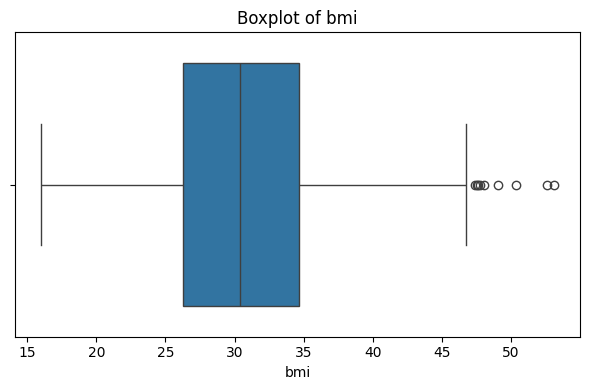

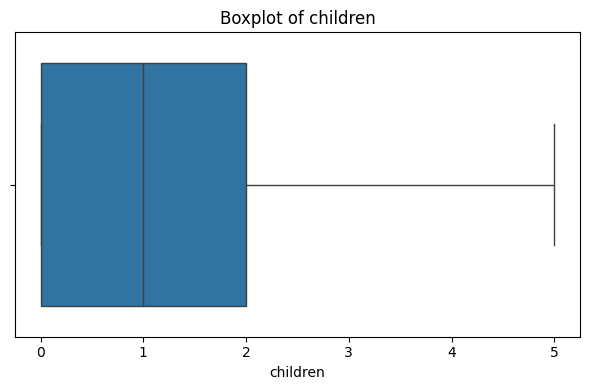

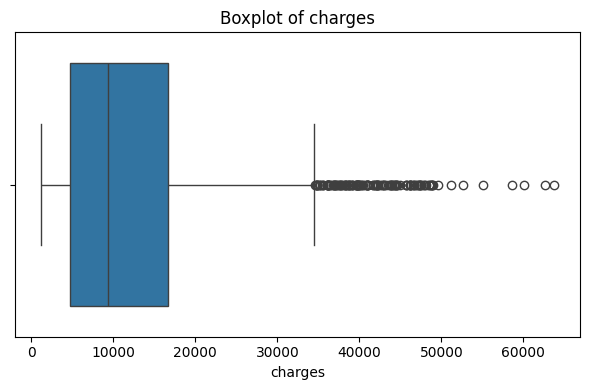

In [64]:
# Plotting operation
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

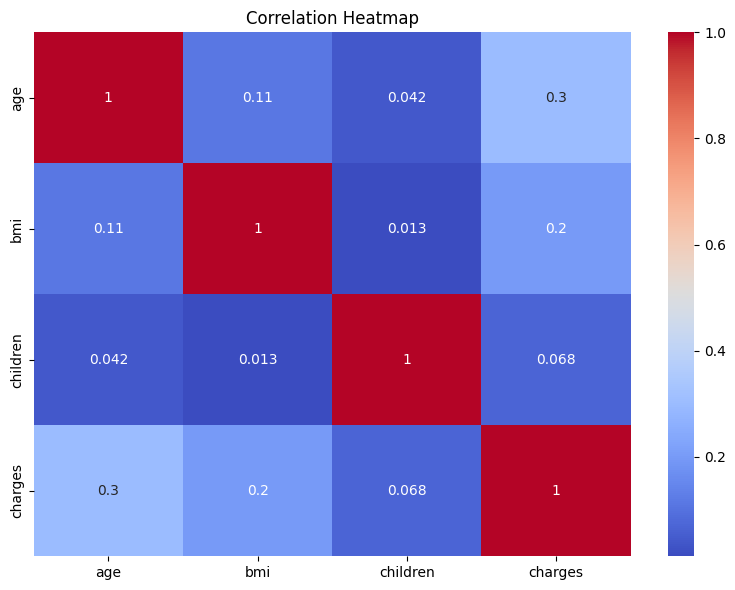

In [65]:
# Plotting operation
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# DATA Cleaning and Preprocessing

In [66]:
df_cleaned = df.copy()


In [67]:
df_cleaned.drop_duplicates(inplace=True)

In [68]:
df_cleaned.shape

(1337, 7)

In [69]:
# Check for missing values in the dataframe
print("Missing Values:\n", df_cleaned.isnull().sum())

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [70]:
print("\nData Types:\n", df_cleaned.dtypes)


Data Types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [71]:
# Count occurrences of each value
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [72]:
df_cleaned['sex'] = df_cleaned['sex'].map({'male': 0, 'female': 1})

In [73]:
# Count occurrences of each value
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [74]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({'no': 0, 'yes': 1})

In [75]:
# Display first few rows of the dataframe
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [76]:
df_cleaned.rename(columns={
    'sex': 'is_female',
    'smoker': 'is_smoker'
}, inplace=True)

In [77]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['region'], drop_first=True)

In [78]:
df_cleaned = df_cleaned.astype(int)

# Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

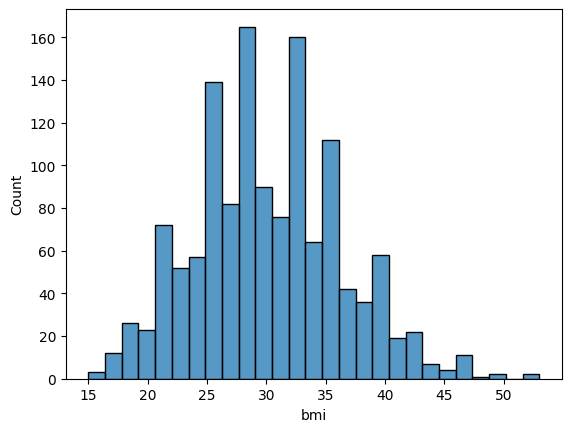

In [79]:
# Statistical visualization
sns.histplot(df_cleaned['bmi'])

In [80]:
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

In [81]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obese
1334,18,1,31,0,0,2205,0,0,0,Obese
1335,18,1,36,0,0,1629,0,1,0,Obese
1336,21,1,25,0,0,2007,0,0,1,Overweight


In [82]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['bmi_category'], drop_first=True)

In [83]:
df_cleaned = df_cleaned.astype(int)

You should scale when you are using ML models that are sensitive to the magnitude of features:

Model Type	Requires Scaling?
Logistic Regression	✅ Yes
Linear Regression	✅ Yes
KNN (K-Nearest Neighbors)	✅ Yes
SVM (Support Vector Machine)	✅ Yes
PCA	✅ Yes
Neural Networks	✅ Yes

❌ Scaling not required for:

Model Type	Why?
Decision Trees	Based on splits, not distances
Random Forest	Same — tree-based
XGBoost / LightGBM	Internally handles scaling

In [84]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [85]:
from sklearn.preprocessing import StandardScaler
cols_to_scale = ['age', 'bmi', 'children']
scaler = StandardScaler()
df_cleaned[cols_to_scale] = scaler.fit_transform(df_cleaned[cols_to_scale])


In [86]:
# Display first few rows of the dataframe
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [87]:

from scipy.stats import pearsonr


# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

# Calculate Pearson correlation
correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}

# Convert to DataFrame for display
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])

# Show the results
correlation_df.sort_values(by='Pearson Correlation', ascending=False)


,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obese,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi_category_Normal,-0.104042


In [88]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

In [89]:
from scipy.stats import chi2_contingency
import pandas as pd

# Define significance level
alpha = 0.05

# Bin the target variable
df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)

# Run Chi-Square test
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

# Convert to DataFrame
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df


,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obese,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [90]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese',
       'charges_bin'],
      dtype='object')

In [91]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast','bmi_category_Obese','region_northwest']]

In [92]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese,region_northwest
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1,0
2,-0.799350,0,0.462463,1.580143,0,4449,1,1,0
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0,1
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0,1
...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1,0
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1,0
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,0


In [94]:
# Drop columns or rows from the dataframe
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    final_df.drop('charges', axis=1),
    final_df['charges'],
    random_state=42,
    test_size=0.20
)
X_train

,age,is_female,bmi,children,is_smoker,region_southeast,bmi_category_Obese,region_northwest
1114,-1.155499,0,-1.008155,-0.909234,0,0,0,0
968,-1.297958,0,-0.844753,0.750351,0,0,0,0
599,0.910164,1,1.116072,0.750351,0,0,1,1
170,1.693691,0,1.769680,-0.909234,0,1,1,0
275,0.554015,1,-0.681351,0.750351,0,0,0,0
...,...,...,...,...,...,...,...,...
1096,0.838934,1,0.625865,0.750351,1,0,1,0
1131,-0.870580,0,2.423288,0.750351,0,0,1,0
1295,-1.369188,0,-1.334960,-0.079442,0,0,0,0
861,-0.087053,1,-0.354547,1.580143,0,0,0,0


In [95]:
# Train the machine learning model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [96]:
# Make predictions using the trained model
y_pred = model.predict(X_test)

In [104]:
# Calculate R² score for regression
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'r2_score: {r2}')

n= X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 =1 - ((1-r2)*(n-1))/(n-p-1)
adjusted_r2

r2_score: 0.8040145984242553


0.7979609952867806

## Summary

### Key Findings

1. **Exploratory Data Analysis**:
   - Successfully explored insurance dataset structure
   - Identified key variables and their distributions
   - Discovered relationships between variables

2. **Data Insights**:
   - Age, BMI, and smoking status significantly impact insurance charges
   - Regional differences exist in insurance costs
   - Gender and number of children show interesting patterns

3. **Visualizations**:
   - Created informative plots showing data patterns
   - Identified outliers and anomalies
   - Understood feature distributions and correlations

### Conclusions

- Comprehensive EDA revealed important insights about insurance data
- Data is well-prepared for predictive modeling
- Key factors affecting insurance charges were identified

### Next Steps

- Build predictive models for insurance charges
- Perform feature engineering based on EDA insights
- Try regression models (Linear, Random Forest, XGBoost)
- Evaluate model performance and interpret results